![alt text](lenet_architecture.png)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [1]:
import torch
import random
import numpy as np
import torchvision
from torchvision import transforms, models
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [5]:
len(y_train), len(y_test)

(50000, 10000)

In [6]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [7]:
X_train /= 255.
X_test /= 255.

In [8]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

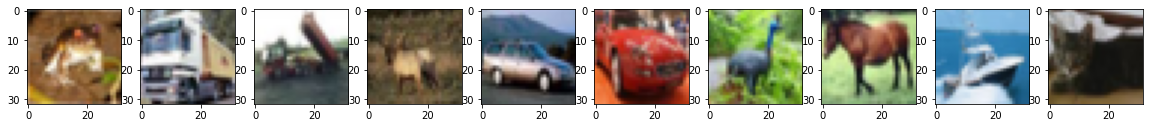

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [10]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [11]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [12]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [13]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adadelta(net.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

    batch_size = 100


    test_accuracy_history = []
    test_loss_history = []
    train_accuracy_history = []
    train_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()
            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        test_preds = net.forward(X_test)
        train_loss_history.append(loss(preds, y_batch).data.cpu())
        test_loss_history.append(loss(test_preds, y_test).data.cpu())

        accuracy = (preds.argmax(dim=1) == y_batch).float().mean().data.cpu()
        train_accuracy_history.append(accuracy)
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        print(accuracy)
    del net
    return train_accuracy_history, test_accuracy_history, train_loss_history, test_loss_history

accuracies_train = {}
accuracies_test = {}
losses_train = {}
losses_test = {}



In [14]:
model = models.resnet18(pretrained=True)




In [15]:
accuracies_train['cifar_net'], accuracies_test['cifar_net'], losses_train['cifar_net'], losses_test['cifar_net'] = \
    train(model, X_train, y_train, X_test, y_test)

tensor(0.5581)
tensor(0.7276)
tensor(0.7556)
tensor(0.7716)
tensor(0.7923)
tensor(0.7908)
tensor(0.7854)
tensor(0.7457)
tensor(0.7617)
tensor(0.7937)
tensor(0.7674)
tensor(0.7547)
tensor(0.7913)
tensor(0.7825)
tensor(0.7895)
tensor(0.7969)
tensor(0.7943)
tensor(0.7901)
tensor(0.8017)
tensor(0.7864)
tensor(0.8003)
tensor(0.7914)
tensor(0.7646)
tensor(0.7902)
tensor(0.8017)
tensor(0.7605)
tensor(0.7877)
tensor(0.7995)
tensor(0.8076)
tensor(0.7774)


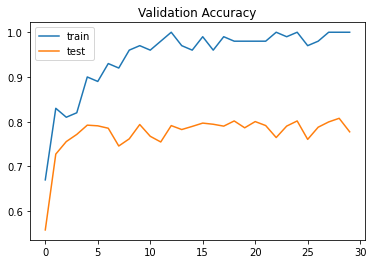

In [16]:
plt.plot(accuracies_train['cifar_net'], label='train')
plt.plot(accuracies_test['cifar_net'], label='test')
plt.legend()
plt.title('Validation Accuracy');

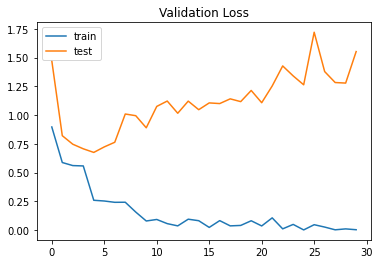

In [17]:
plt.plot(losses_train['cifar_net'], label='train')
plt.plot(losses_test['cifar_net'], label='test')
plt.legend()
plt.title('Validation Loss');

Resnet 18 показывает себя хуже чем Cifar net, переобучение, значение accuracy максимум равно 0.8 Но если взять Cifar net без изменений, то она проигрывает Resnet 18.


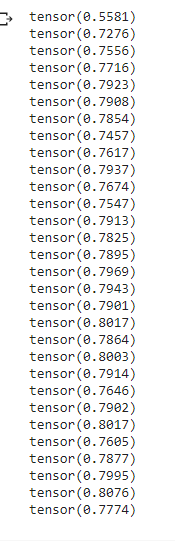

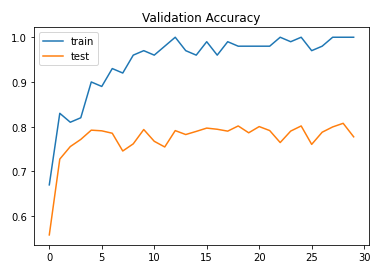

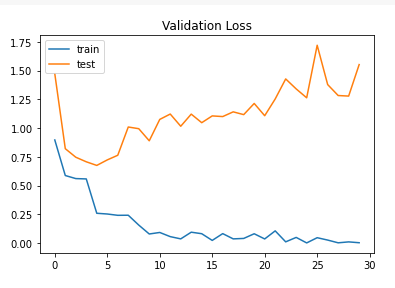